In [3]:
!pip install pyspark==3.0.1 py4j==0.10.9

     |████████████████████████████████| 204.2 MB 39 kB/s 
     |████████████████████████████████| 198 kB 78.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612246 sha256=1adf151b3b0639cf5753efc8ca7c4f2ea9095532222f10187970584e44cea097
  Stored in directory: /root/.cache/pip/wheels/5e/34/fa/b37b5cef503fc5148b478b2495043ba61b079120b7ff379f9b
Successfully built pyspark


In [4]:
from pyspark.sql import SparkSession

spark = SparkSession\
        .builder\
        .master("local[4]")\
        .appName('lab_4')\
        .getOrCreate()

In [7]:
csv_file = r"/content/IHME_GDP_1960_2050_Y2021M09D22.CSV"
data = spark.read.csv(csv_file, header=True)

data.show(5)

+-----------+-------------+----+------+----+----------------+----------------+----------------+----------------+----------------+----------------+
|location_id|location_name|iso3| level|year|    gdp_ppp_mean|   gdp_ppp_lower|   gdp_ppp_upper|    gdp_usd_mean|   gdp_usd_lower|   gdp_usd_upper|
+-----------+-------------+----+------+----+----------------+----------------+----------------+----------------+----------------+----------------+
|          1|       Global|   G|Global|1960|17483449774122.9|16019146112388.8|19115862416823.5|12968625317543.8|12668903338177.2|13341765801289.3|
|          1|       Global|   G|Global|1961|18135370554950.5|16595371585758.2|19824927264221.5|13460972883451.6|13147665079303.8|13830213685062.9|
|          1|       Global|   G|Global|1962|18953278607513.5|17390391432341.6|20614772322197.6|14065757980933.9|13760596066680.6|  14437458446538|
|          1|       Global|   G|Global|1963|19656620517295.9|18117057797516.5|21349934484879.7|14618310920876.4|143213

In [9]:
data = spark.read.csv('/content/IHME_GDP_1960_2050_Y2021M09D22.CSV'
, sep=',', header=True)
data.printSchema()


root
 |-- location_id: string (nullable = true)
 |-- location_name: string (nullable = true)
 |-- iso3: string (nullable = true)
 |-- level: string (nullable = true)
 |-- year: string (nullable = true)
 |-- gdp_ppp_mean: string (nullable = true)
 |-- gdp_ppp_lower: string (nullable = true)
 |-- gdp_ppp_upper: string (nullable = true)
 |-- gdp_usd_mean: string (nullable = true)
 |-- gdp_usd_lower: string (nullable = true)
 |-- gdp_usd_upper: string (nullable = true)



In [10]:
from pyspark.sql.types import *
data_schema = [ 
    StructField('location_id', IntegerType(), True),
    StructField('location_name', StringType(), True),
    StructField('iso3', StringType(), True),
    StructField('level', StringType(), True),
    StructField('year', IntegerType(), True),
    StructField('gdp_ppp_mean', FloatType(), True),
    StructField('gdp_ppp_lower', FloatType(), True),
    StructField('gdp_ppp_upper', FloatType(), True),
    StructField('gdp_usd_mean', FloatType(), True),
    StructField('gdp_usd_lower', FloatType(), True),
    StructField('gdp_usd_upper', FloatType(), True),
    ]

final_struc = StructType(fields = data_schema)

data2 = spark.read.csv(csv_file, header=True, schema=final_struc)
data2.printSchema()

root
 |-- location_id: integer (nullable = true)
 |-- location_name: string (nullable = true)
 |-- iso3: string (nullable = true)
 |-- level: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- gdp_ppp_mean: float (nullable = true)
 |-- gdp_ppp_lower: float (nullable = true)
 |-- gdp_ppp_upper: float (nullable = true)
 |-- gdp_usd_mean: float (nullable = true)
 |-- gdp_usd_lower: float (nullable = true)
 |-- gdp_usd_upper: float (nullable = true)



In [11]:
data.dtypes

[('location_id', 'string'),
 ('location_name', 'string'),
 ('iso3', 'string'),
 ('level', 'string'),
 ('year', 'string'),
 ('gdp_ppp_mean', 'string'),
 ('gdp_ppp_lower', 'string'),
 ('gdp_ppp_upper', 'string'),
 ('gdp_usd_mean', 'string'),
 ('gdp_usd_lower', 'string'),
 ('gdp_usd_upper', 'string')]

In [99]:
data2.head(2)


[Row(location_id=1, location_name='Global', iso3='G', level='Global', year=1960, gdp_ppp_mean=17483449761792.0, gdp_ppp_lower=16019145883648.0, gdp_ppp_upper=19115863441408.0, gdp_usd_mean=12968625438720.0, gdp_usd_lower=12668903620608.0, gdp_usd_upper=13341765402624.0),
 Row(location_id=1, location_name='Global', iso3='G', level='Global', year=1961, gdp_ppp_mean=18135371481088.0, gdp_ppp_lower=16595371950080.0, gdp_ppp_upper=19824927309824.0, gdp_usd_mean=13460972765184.0, gdp_usd_lower=13147665596416.0, gdp_usd_upper=13830214123520.0)]

In [12]:
data2.tail(2)

[Row(location_id=44578, location_name='Low income', iso3=None, level='World Bank Income Group', year=2049, gdp_ppp_mean=3941855657984.0, gdp_ppp_lower=3398883606528.0, gdp_ppp_upper=4560961142784.0, gdp_usd_mean=1262128726016.0, gdp_usd_lower=1122894872576.0, gdp_usd_upper=1413991235584.0),
 Row(location_id=44578, location_name='Low income', iso3=None, level='World Bank Income Group', year=2050, gdp_ppp_mean=4053882634240.0, gdp_ppp_lower=3482933002240.0, gdp_ppp_upper=4713596059648.0, gdp_usd_mean=1300764164096.0, gdp_usd_lower=1151548260352.0, gdp_usd_upper=1457362042880.0)]

In [13]:
res = data2.withColumn('Nowa kolumna', data2.year*0 + 1000)

In [14]:
res = res.withColumnRenamed ('Nowa kolumna', 'col')

In [15]:
res = data2.drop ('col')

In [16]:
from pyspark.sql.functions import udf


i = -1
def incr ():
    global i
    i = i+1
    return i

newCol = udf(incr , IntegerType ())

# dodanie nowej kolumny
data3 = data2.withColumn ('id', newCol ())

data3.show (5)

+-----------+-------------+----+------+----+-------------+-------------+-------------+-------------+-------------+-------------+---+
|location_id|location_name|iso3| level|year| gdp_ppp_mean|gdp_ppp_lower|gdp_ppp_upper| gdp_usd_mean|gdp_usd_lower|gdp_usd_upper| id|
+-----------+-------------+----+------+----+-------------+-------------+-------------+-------------+-------------+-------------+---+
|          1|       Global|   G|Global|1960|1.74834498E13|1.60191459E13|1.91158634E13|1.29686254E13|1.26689036E13|1.33417654E13|  0|
|          1|       Global|   G|Global|1961|1.81353715E13| 1.6595372E13|1.98249273E13|1.34609728E13|1.31476656E13|1.38302141E13|  1|
|          1|       Global|   G|Global|1962|1.89532796E13|1.73903918E13|2.06147714E13|1.40657578E13| 1.3760596E13|1.44374581E13|  2|
|          1|       Global|   G|Global|1963|1.96566204E13|1.81170571E13|2.13499343E13|1.46183113E13| 1.4321321E13|1.49769274E13|  3|
|          1|       Global|   G|Global|1964|2.10057476E13|1.93566417E

In [17]:
# poczatkowa liczba rekordow
data3.count()

19838

In [18]:

# usuniecie wierszy bez danych ( sposob 1.)
data4 = data3.na.drop()

In [19]:
data4.count()

18655

In [20]:
# wstawienie zera w miejsce braku danych ( sposob 2.)
data5 = data3.na.fill(data3.select(0 * data3.year).collect()[0][0])

data5.count()

19838

In [21]:
data5.select(['year', 'location_id', 'location_name']).show(5)

+----+-----------+-------------+
|year|location_id|location_name|
+----+-----------+-------------+
|1960|          1|       Global|
|1961|          1|       Global|
|1962|          1|       Global|
|1963|          1|       Global|
|1964|          1|       Global|
+----+-----------+-------------+
only showing top 5 rows



In [22]:
from pyspark.sql.functions import col

data5 .filter(( col('year') >= 2000) & (col('location_id') > 20)).select (['year',
'location_name', 'location_id']).show (5)

+----+-------------+-----------+
|year|location_name|location_id|
+----+-------------+-----------+
|2000|         Fiji|         22|
|2001|         Fiji|         22|
|2002|         Fiji|         22|
|2003|         Fiji|         22|
|2004|         Fiji|         22|
+----+-------------+-----------+
only showing top 5 rows



In [23]:
# dodanie kolumny zawierajacej wynik sprawdzenia , 
#czy rok jest wiekszy niz 2000
from pyspark . sql import functions as f

data5.select('year', 'location_id', 'location_name'
, f.when(data5.year > 2000, '21st century').otherwise ('20 th century')
.alias ('century')).show (5)

# dodanie kolumny zawierajacej wynik sprawdzenia , 
#czy nazwa kraju zaczyna sie od litery ’A’
data5.select('year', 'location_id', 'location_name', 
             data5.location_name.rlike('^F').alias('Acountry')). show (5)

+----+-----------+-------------+-------------+
|year|location_id|location_name|      century|
+----+-----------+-------------+-------------+
|1960|          1|       Global|20 th century|
|1961|          1|       Global|20 th century|
|1962|          1|       Global|20 th century|
|1963|          1|       Global|20 th century|
|1964|          1|       Global|20 th century|
+----+-----------+-------------+-------------+
only showing top 5 rows

+----+-----------+-------------+--------+
|year|location_id|location_name|Acountry|
+----+-----------+-------------+--------+
|1960|          1|       Global|   false|
|1961|          1|       Global|   false|
|1962|          1|       Global|   false|
|1963|          1|       Global|   false|
|1964|          1|       Global|   false|
+----+-----------+-------------+--------+
only showing top 5 rows



In [24]:
# pogrupowanie danych wg kraju
from pyspark.sql.functions import mean, count, min, max


data5.select(['year', 'location_id', 'location_name']).groupBy('location_name')\
      .agg(
          count('year').alias('number of countries'),
          mean('location_id').alias('number'),
          min('year').alias('min year'),
          max('year').alias('max year')  
      ).show(5)


+--------------------+-------------------+------+--------+--------+
|       location_name|number of countries|number|min year|max year|
+--------------------+-------------------+------+--------+--------+
|          South Asia|                182| 158.5|    1960|    2050|
|       Côte d'Ivoire|                 91| 205.0|    1960|    2050|
|Micronesia (Feder...|                 91|  25.0|    1960|    2050|
|                Chad|                 91| 204.0|    1960|    2050|
|            Paraguay|                 91| 136.0|    1960|    2050|
+--------------------+-------------------+------+--------+--------+
only showing top 5 rows



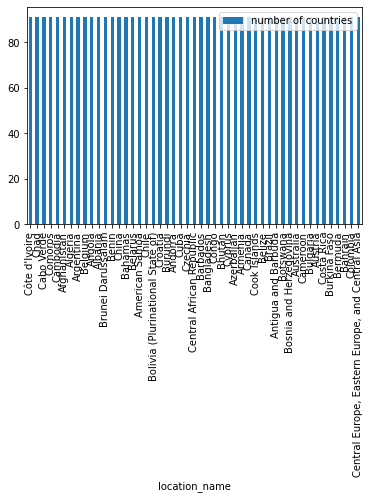

In [42]:
from matplotlib import pyplot as plt

res = data5.filter(data5.location_name.rlike('^[ABC]'))\
.select(['year', 'location_id', 'location_name']).groupBy('location_name')\
      .agg(
          count('year').alias('number of countries'),
          mean('location_id').alias('number'),
          mean('year').alias('mean year'),
          max('year').alias('max year')  
      ).toPandas()

res.plot(kind='bar', x='location_name', y='number of countries')
plt.show()